In [ ]:
import torch
from torchvision import models, datasets, transforms
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

from PIL import Image
import pandas as pd
import os
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

from tqdm import tqdm

from utils import WaterbirdsFullData, full_loss, tsne_visualization

In [3]:
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

trainset = WaterbirdsFullData('waterbird_complete95_forest2water2', 'waterbird_complete95_forest2water2/metadata.csv', 'train', transform = transform)
valset = WaterbirdsFullData('waterbird_complete95_forest2water2', 'waterbird_complete95_forest2water2/metadata.csv', 'val', transform = transform)
testset = WaterbirdsFullData('waterbird_complete95_forest2water2', 'waterbird_complete95_forest2water2/metadata.csv', 'test', transform = transform)

trainloader = DataLoader(trainset, batch_size=256, shuffle=True, num_workers = 4)
valloader = DataLoader(valset, batch_size=256, shuffle=False, num_workers = 4)

In [5]:
epochs = 30
model = models.resnet50()
model.fc = nn.Identity()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
scheudler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1)


train_loss_history = []
val_loss_history = []
device_id = 0
device = torch.device(f'cuda:{device_id}' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

In [6]:
for epoch in range(epochs):
    model.train()
    train_loss = 0
    total_steps = 0
    for i, (images, labels, _) in enumerate(tqdm(trainloader)):
        optimizer.zero_grad()
        images, labels = images.to(device), labels.to(device)
        features = model(images)
        loss = full_loss(features, labels)
        loss.backward()
        optimizer.step()
        total_steps +=1
        train_loss += loss.item()
    
    train_loss_history.append(train_loss / total_steps)    
    tqdm.write(f'Epoch: {epoch}, Loss: {train_loss / total_steps}')

    model.eval()
    with torch.no_grad():
        val_loss = 0
        total_steps
        for i, (images, labels, _) in enumerate(valloader):
            images, labels = images.to(device), labels.to(device)
            features = model(images)
            loss = full_loss(features, labels)
            val_loss += loss.item()
            total_steps += 1
        val_loss_history.append(val_loss / total_steps)
    tqdm.write(f'Epoch: {epoch}, Val Loss: {val_loss / total_steps}')
    scheudler.step()

100%|██████████| 19/19 [00:09<00:00,  1.93it/s]

Epoch: 0, Loss: 4.432723170832584


Epoch: 0, Val Loss: 0.999368945757548


100%|██████████| 19/19 [00:09<00:00,  2.03it/s]

Epoch: 1, Loss: 4.195172962389495


Epoch: 1, Val Loss: 0.9532132943471273


100%|██████████| 19/19 [00:09<00:00,  1.97it/s]

Epoch: 2, Loss: 4.164594725558632


Epoch: 2, Val Loss: 0.940951387087504


100%|██████████| 19/19 [00:09<00:00,  2.02it/s]

Epoch: 3, Loss: 4.0987497630872225


Epoch: 3, Val Loss: 0.9320132533709208


100%|██████████| 19/19 [00:09<00:00,  2.10it/s]

Epoch: 4, Loss: 4.0598430382577995


Epoch: 4, Val Loss: 0.9060648481051127


100%|██████████| 19/19 [00:09<00:00,  1.97it/s]

Epoch: 5, Loss: 4.046509567059968


Epoch: 5, Val Loss: 0.9026263554890951


100%|██████████| 19/19 [00:09<00:00,  2.03it/s]

Epoch: 6, Loss: 4.048016874413741


Epoch: 6, Val Loss: 0.9025939702987671


100%|██████████| 19/19 [00:08<00:00,  2.11it/s]

Epoch: 7, Loss: 4.021555875477038


Epoch: 7, Val Loss: 0.9054377873738607


100%|██████████| 19/19 [00:09<00:00,  1.97it/s]

Epoch: 8, Loss: 4.00560978839272


Epoch: 8, Val Loss: 0.880905548731486


100%|██████████| 19/19 [00:08<00:00,  2.21it/s]

Epoch: 9, Loss: 3.991992611634104


Epoch: 9, Val Loss: 0.8827852606773376


100%|██████████| 19/19 [00:08<00:00,  2.13it/s]

Epoch: 10, Loss: 4.002007195824071


Epoch: 10, Val Loss: 0.8763413031895956


100%|██████████| 19/19 [00:09<00:00,  2.03it/s]

Epoch: 11, Loss: 3.989971110695287


Epoch: 11, Val Loss: 0.8967292706171671


100%|██████████| 19/19 [00:09<00:00,  2.01it/s]

Epoch: 12, Loss: 3.9702274297413074


Epoch: 12, Val Loss: 0.8956077297528585


100%|██████████| 19/19 [00:09<00:00,  2.04it/s]

Epoch: 13, Loss: 3.9837564041740015


Epoch: 13, Val Loss: 0.9056648214658102


100%|██████████| 19/19 [00:08<00:00,  2.12it/s]

Epoch: 14, Loss: 3.995108780108


Epoch: 14, Val Loss: 0.8907254735628763


100%|██████████| 19/19 [00:09<00:00,  2.03it/s]

Epoch: 15, Loss: 3.955790921261436


Epoch: 15, Val Loss: 0.8834160963694254


100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

Epoch: 16, Loss: 3.9348816746159603


Epoch: 16, Val Loss: 0.884228527545929


100%|██████████| 19/19 [00:09<00:00,  2.08it/s]

Epoch: 17, Loss: 3.9183812894319234


Epoch: 17, Val Loss: 0.8853344519933065


100%|██████████| 19/19 [00:08<00:00,  2.14it/s]

Epoch: 18, Loss: 3.9029746557536877


Epoch: 18, Val Loss: 0.8928675850232443


100%|██████████| 19/19 [00:09<00:00,  2.02it/s]

Epoch: 19, Loss: 3.894846050362838


Epoch: 19, Val Loss: 0.8921732505162557


100%|██████████| 19/19 [00:08<00:00,  2.12it/s]

Epoch: 20, Loss: 3.874755771536576


Epoch: 20, Val Loss: 0.9006010492642721


100%|██████████| 19/19 [00:08<00:00,  2.11it/s]

Epoch: 21, Loss: 3.867250969535426


Epoch: 21, Val Loss: 0.9012574354807535


100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

Epoch: 22, Loss: 3.8565791029679146


Epoch: 22, Val Loss: 0.9080684781074524


100%|██████████| 19/19 [00:09<00:00,  1.97it/s]

Epoch: 23, Loss: 3.8398606400740776


Epoch: 23, Val Loss: 0.915736973285675


100%|██████████| 19/19 [00:09<00:00,  2.01it/s]

Epoch: 24, Loss: 3.8269485297955965


Epoch: 24, Val Loss: 0.9221917390823364


100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

Epoch: 25, Loss: 3.82112529403285


Epoch: 25, Val Loss: 0.9223953485488892


100%|██████████| 19/19 [00:08<00:00,  2.13it/s]

Epoch: 26, Loss: 3.819966429158261


Epoch: 26, Val Loss: 0.9306784073511759


100%|██████████| 19/19 [00:08<00:00,  2.17it/s]

Epoch: 27, Loss: 3.806522996802079


Epoch: 27, Val Loss: 0.9318297704060873


100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

Epoch: 28, Loss: 3.7974981006823088


Epoch: 28, Val Loss: 0.9350654284159342


100%|██████████| 19/19 [00:09<00:00,  2.02it/s]

Epoch: 29, Loss: 3.7914170591454757


Epoch: 29, Val Loss: 0.9488923152287801


Text(0.5, 1.0, 'Val Loss')

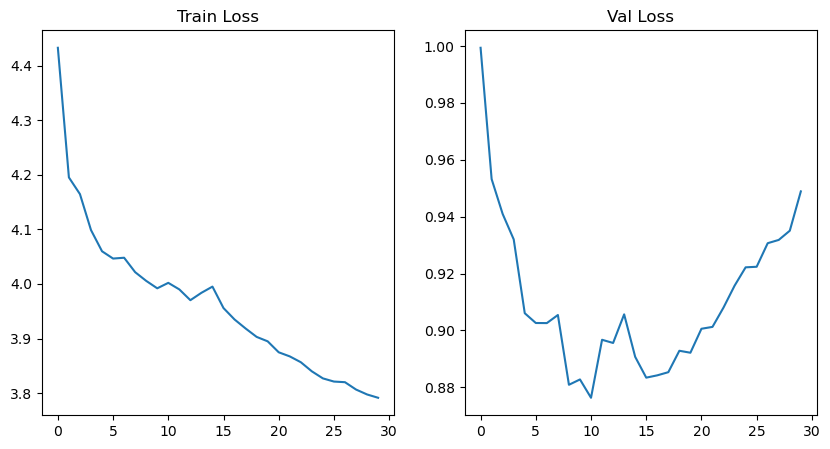

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(train_loss_history)
axes[0].set_title('Train Loss')
axes[1].plot(val_loss_history)
axes[1].set_title('Val Loss')

In [29]:
model.eval()
model.fc = nn.Identity()

valloader = DataLoader(valset, batch_size=1, shuffle=False, num_workers=4)

embeddings = np.zeros((len(valloader), 2048))
labels = np.zeros(len(valloader))
stratum = np.zeros(len(valloader))

with torch.no_grad():
    for i, (images, label, strata) in enumerate(tqdm(valloader)):
        images, label = images.to(device), label.to(device)
        features = model(images)
        embeddings[i: (i + 1)] = features.cpu().numpy()
        labels[i: (i + 1)] = label.cpu().numpy()
        stratum[i: (i + 1)] = strata.item()

100%|██████████| 1199/1199 [00:08<00:00, 138.21it/s]


In [30]:
labels.shape, strata.shape

((1199,), torch.Size([1]))

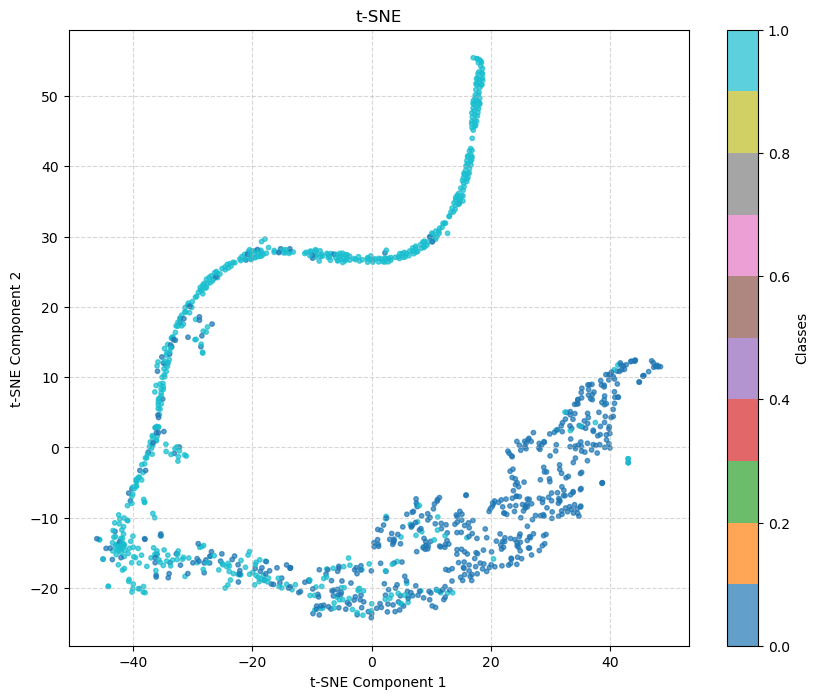

In [31]:
tsne_visualization(embeddings, stratum, title="t-SNE")

In [11]:
model.fc = nn.Linear(2048, 2)
model.fc = model.fc.to(device)

for param in model.parameters():
    param.requires_grad = False

for param in model.fc.parameters():
    param.requires_grad = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.0001)
train_accuracy = []
val_accuracy = []

trainloader, valloader = DataLoader(trainset, batch_size=256, shuffle=True, num_workers=4), DataLoader(valset, batch_size=256, shuffle=False, num_workers=4)

In [12]:
for epoch in range(epochs):
    model.fc.train()
    train_loss = 0
    total_steps = 0
    correct = 0
    total = 0
    for i, (images, labels, _) in enumerate(tqdm(trainloader)):
        optimizer.zero_grad()
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_steps +=1
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    train_accuracy.append(correct / total)    
    tqdm.write(f'Epoch: {epoch}, Loss: {train_loss / total_steps}, Accuracy: {correct / total}')

    model.eval()
    with torch.no_grad():
        val_loss = 0
        total_steps = 0
        correct = 0
        total = 0
        for i, (images, labels, _) in enumerate(valloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            total_steps += 1
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        val_accuracy.append(correct / total)
    
    tqdm.write(f'Epoch: {epoch}, Val Loss: {val_loss / total_steps}, Val Accuracy: {correct / total}')

100%|██████████| 19/19 [00:05<00:00,  3.73it/s]

Epoch: 0, Loss: 0.32450534560178457, Accuracy: 0.9762252346193953


Epoch: 0, Val Loss: 1.186890196800232, Val Accuracy: 0.6422018348623854


100%|██████████| 19/19 [00:05<00:00,  3.59it/s]

Epoch: 1, Loss: 0.19050405997979014, Accuracy: 0.983941605839416


Epoch: 1, Val Loss: 1.3742769479751586, Val Accuracy: 0.6430358632193495


100%|██████████| 19/19 [00:05<00:00,  3.56it/s]

Epoch: 2, Loss: 0.16842626427349291, Accuracy: 0.983941605839416


Epoch: 2, Val Loss: 1.4099086046218872, Val Accuracy: 0.646371976647206


100%|██████████| 19/19 [00:05<00:00,  3.65it/s]

Epoch: 3, Loss: 0.15912291917361712, Accuracy: 0.9837330552659019


Epoch: 3, Val Loss: 1.4775241374969483, Val Accuracy: 0.646371976647206


100%|██████████| 19/19 [00:05<00:00,  3.80it/s]

Epoch: 4, Loss: 0.15409271536689056, Accuracy: 0.9837330552659019


Epoch: 4, Val Loss: 1.5125725507736205, Val Accuracy: 0.6472060050041701


100%|██████████| 19/19 [00:05<00:00,  3.72it/s]

Epoch: 5, Loss: 0.14657371608834519, Accuracy: 0.9837330552659019


Epoch: 5, Val Loss: 1.573876929283142, Val Accuracy: 0.646371976647206


100%|██████████| 19/19 [00:05<00:00,  3.66it/s]

Epoch: 6, Loss: 0.14416752716428355, Accuracy: 0.9837330552659019


Epoch: 6, Val Loss: 1.6304177522659302, Val Accuracy: 0.646371976647206


100%|██████████| 19/19 [00:05<00:00,  3.76it/s]

Epoch: 7, Loss: 0.14084959187005697, Accuracy: 0.9837330552659019


Epoch: 7, Val Loss: 1.6632638216018676, Val Accuracy: 0.646371976647206


100%|██████████| 19/19 [00:05<00:00,  3.58it/s]

Epoch: 8, Loss: 0.1382275027664084, Accuracy: 0.9837330552659019


Epoch: 8, Val Loss: 1.686548686027527, Val Accuracy: 0.646371976647206


100%|██████████| 19/19 [00:05<00:00,  3.77it/s]

Epoch: 9, Loss: 0.13584506041125247, Accuracy: 0.9837330552659019


Epoch: 9, Val Loss: 1.7326897859573365, Val Accuracy: 0.646371976647206


100%|██████████| 19/19 [00:05<00:00,  3.65it/s]

Epoch: 10, Loss: 0.13472230301091545, Accuracy: 0.983941605839416


Epoch: 10, Val Loss: 1.783708882331848, Val Accuracy: 0.6455379482902419


100%|██████████| 19/19 [00:05<00:00,  3.72it/s]

Epoch: 11, Loss: 0.13164799542803512, Accuracy: 0.9837330552659019


Epoch: 11, Val Loss: 1.7589234828948974, Val Accuracy: 0.6480400333611342


100%|██████████| 19/19 [00:05<00:00,  3.68it/s]

Epoch: 12, Loss: 0.13088633825904444, Accuracy: 0.9837330552659019


Epoch: 12, Val Loss: 1.847634983062744, Val Accuracy: 0.646371976647206


100%|██████████| 19/19 [00:05<00:00,  3.74it/s]

Epoch: 13, Loss: 0.1296334517629523, Accuracy: 0.983941605839416


Epoch: 13, Val Loss: 1.8444671392440797, Val Accuracy: 0.6472060050041701


100%|██████████| 19/19 [00:05<00:00,  3.64it/s]

Epoch: 14, Loss: 0.12985944198934654, Accuracy: 0.983941605839416


Epoch: 14, Val Loss: 1.8825922966003419, Val Accuracy: 0.6472060050041701


100%|██████████| 19/19 [00:05<00:00,  3.64it/s]

Epoch: 15, Loss: 0.1269599552217283, Accuracy: 0.9837330552659019


Epoch: 15, Val Loss: 1.8651397943496704, Val Accuracy: 0.6497080900750626


100%|██████████| 19/19 [00:05<00:00,  3.75it/s]

Epoch: 16, Loss: 0.1257773198579487, Accuracy: 0.983941605839416


Epoch: 16, Val Loss: 1.9262224674224853, Val Accuracy: 0.6472060050041701


100%|██████████| 19/19 [00:05<00:00,  3.75it/s]

Epoch: 17, Loss: 0.12501081314526105, Accuracy: 0.983941605839416


Epoch: 17, Val Loss: 1.9111961841583252, Val Accuracy: 0.6480400333611342


100%|██████████| 19/19 [00:04<00:00,  3.84it/s]

Epoch: 18, Loss: 0.12486918035306428, Accuracy: 0.9837330552659019


Epoch: 18, Val Loss: 1.944675326347351, Val Accuracy: 0.6480400333611342


100%|██████████| 19/19 [00:05<00:00,  3.75it/s]

Epoch: 19, Loss: 0.12351957512529273, Accuracy: 0.983941605839416


KeyboardInterrupt: 